In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy
import cartopy.crs as ccrs
import cmocean 
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import zarr  # to read in Zarr format
import gcsfs # to read google cloud data
import momlevel as ml
import cftime
import cmocean

In [3]:
xr.set_options(display_style='html')
%matplotlib inline                           
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6  

In [4]:
google_cloud_cmip6 = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')

In [5]:
#data retrieval from google cloud performed by Anna Coomans
O2_SSP245_data = google_cloud_cmip6.query( 
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'o2' & \
    experiment_id == 'ssp245' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)

In [6]:
#data retrieval from google cloud performed by Anna Coomans
o2sat_ssp245_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'o2sat' & \
    experiment_id == 'ssp245' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)

In [7]:
O2_SSP245_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
15191,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp245,r1i1p1f1,Omon,o2,gr,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [8]:
o2sat_ssp245_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
15189,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp245,r1i1p1f1,Omon,o2sat,gr,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [9]:
gcs = gcsfs.GCSFileSystem(token='anon')

In [10]:
#performed by Anna Coomans
zstore_O2_SSP245_data = O2_SSP245_data.zstore.values[-1]
zstore_o2sat_ssp245 = o2sat_ssp245_data.zstore.values[-1]

In [11]:
#data remapping performed by Anna Coomans
mapper_O2_SSP245 = gcs.get_mapper(zstore_O2_SSP245_data)
O2_SSP245 = xr.open_zarr(mapper_O2_SSP245, 
                                consolidated=True,use_cftime=True).o2.rename({'lat':'latitude',
                                                             'lon':'longitude'})
mapper_o2sat_ssp245 = gcs.get_mapper(zstore_o2sat_ssp245)
O2_sat_SSP245 = xr.open_zarr(mapper_o2sat_ssp245, 
                                consolidated=True,use_cftime=True).o2sat.rename({'lat':'latitude',
                                                             'lon':'longitude'})

Text(0.5, 1.0, 'Time Averaged Surface Map of Dissolved Oxygen Content for SSP245')

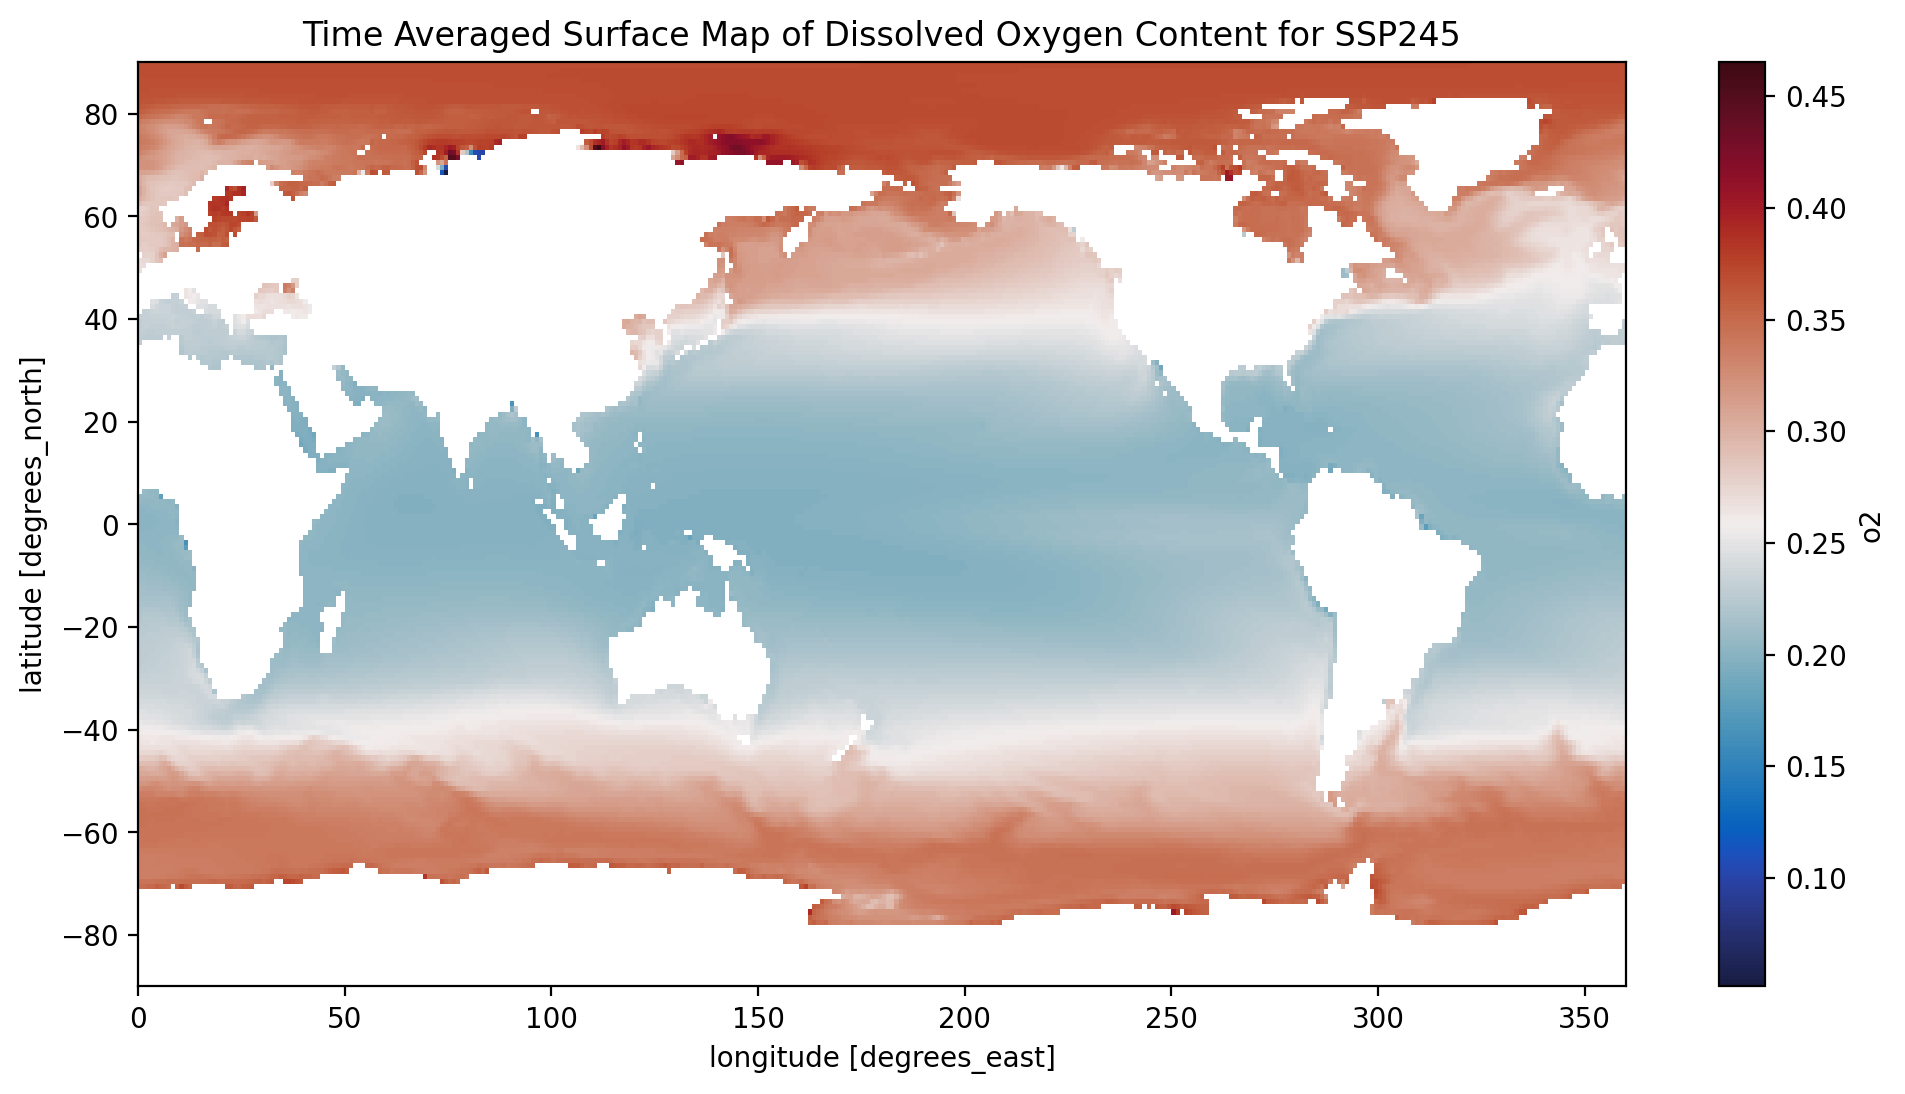

In [28]:
#time averaged across entire time period
avg_O2_SSP245 = O2_SSP245.mean(dim='time').isel(lev=0).plot(cmap=cmocean.cm.balance)
plt.title('Time Averaged Surface Map of Dissolved Oxygen Content for SSP245')

Text(0.5, 1.0, 'Time Averaged Zonal Map of Dissolved Oxygen Content for SSP245')

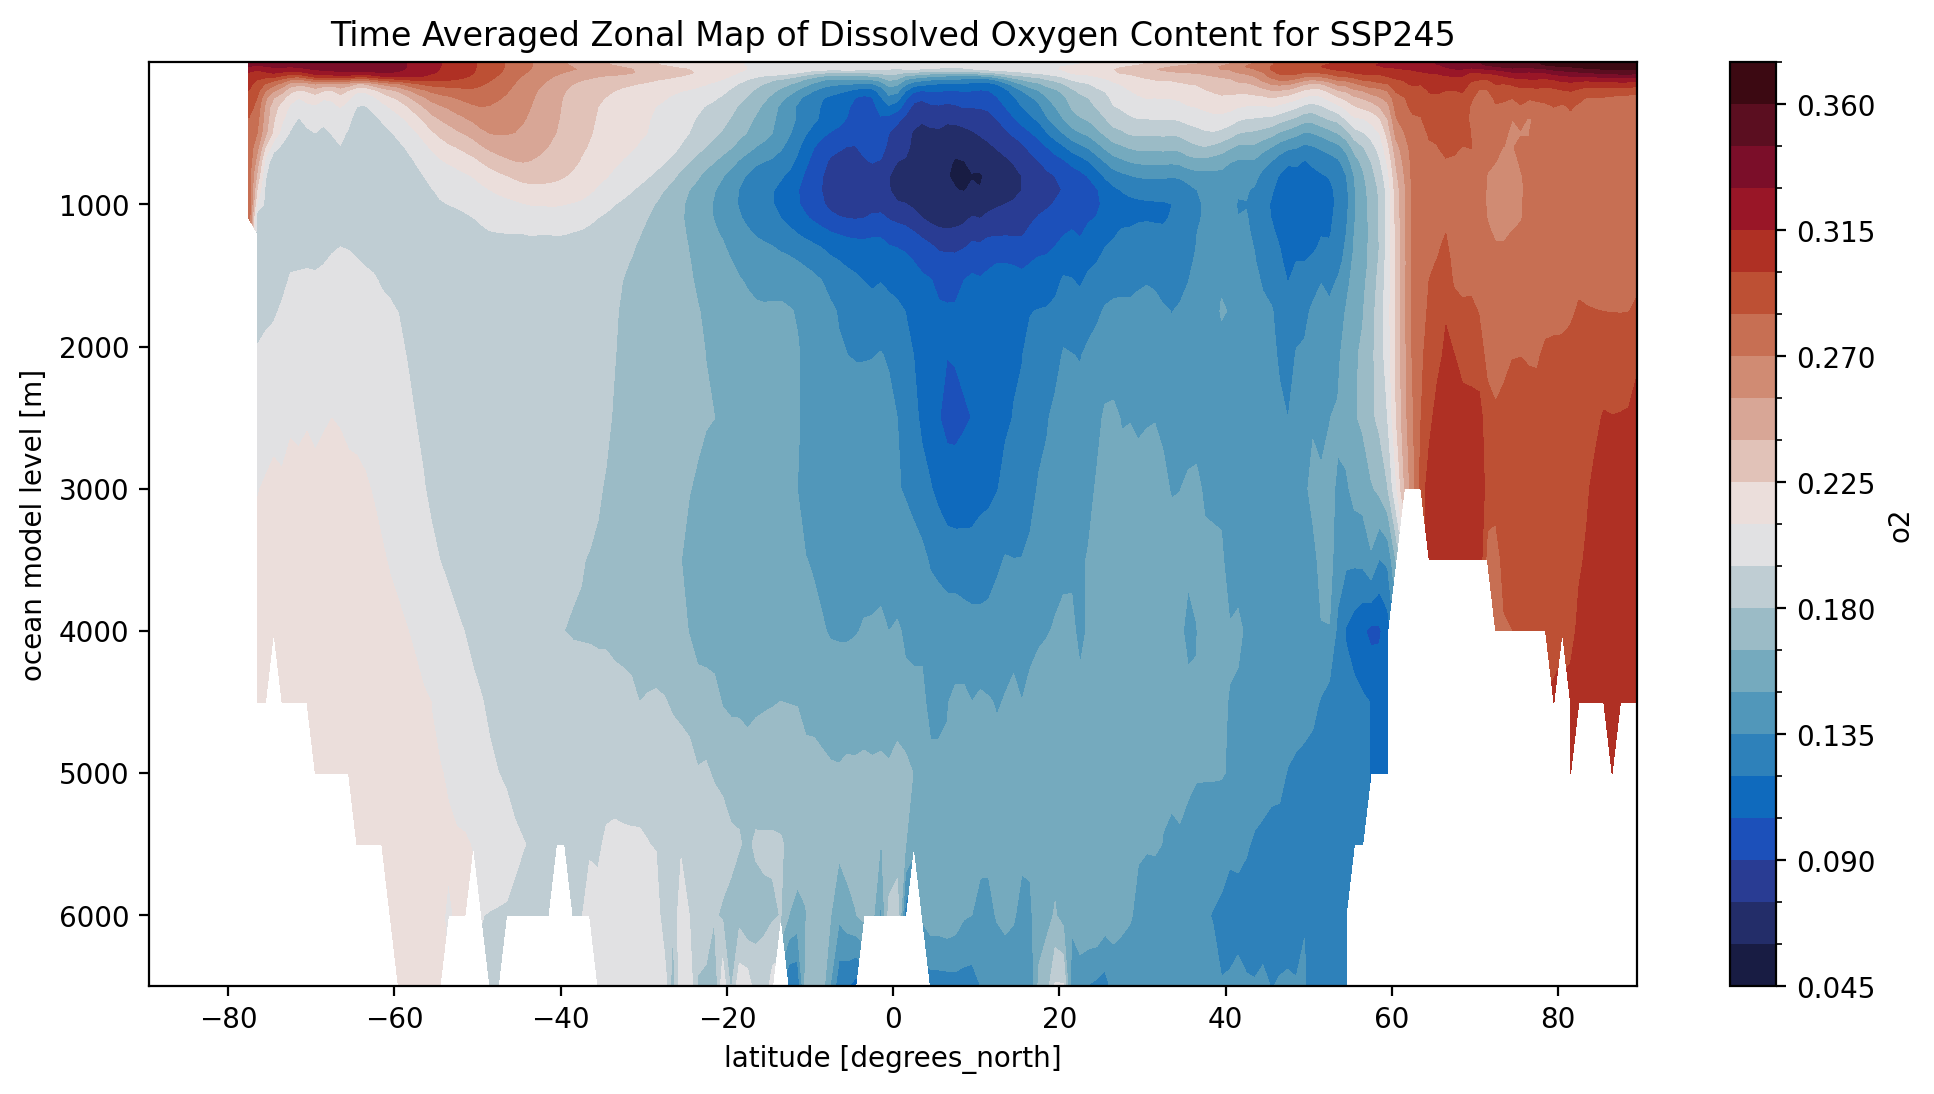

In [40]:
#time averaged across entire time period
ta_O2_SSP245 = O2_SSP245.mean(dim='time')
zm_O2_SSP245 = ta_O2_SSP245.mean(dim='longitude').plot.contourf(
    cmap=cmocean.cm.balance, yincrease=False, levels=30)
plt.title('Time Averaged Zonal Map of Dissolved Oxygen Content for SSP245')

Text(0.5, 1.0, 'Time Averaged Surface Map of Oxygen Saturation Content for SSP245')

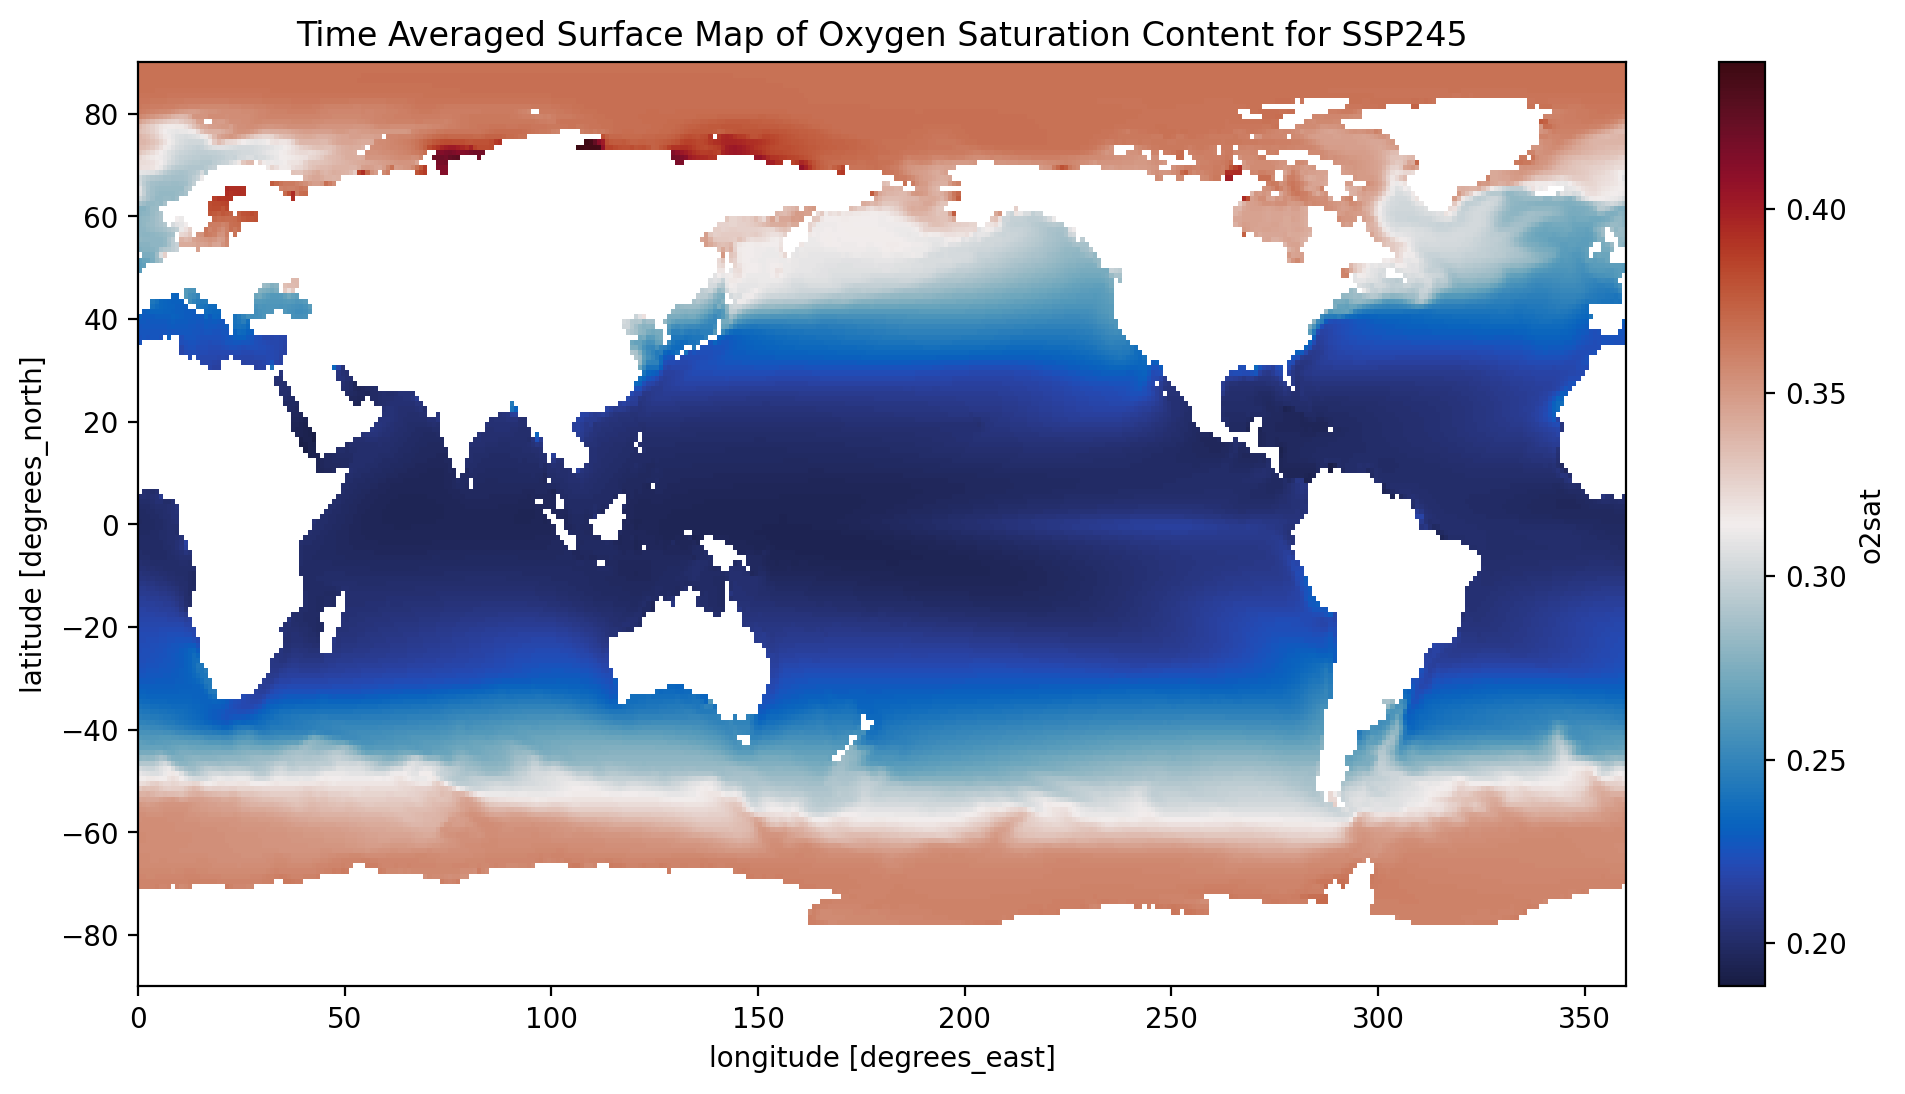

In [36]:
#time averaged across entire time period
avg_O2_sat_SSP245 = O2_sat_SSP245.mean(dim='time').isel(lev=0).plot(cmap=cmocean.cm.balance)
plt.title('Time Averaged Surface Map of Oxygen Saturation Content for SSP245')

Text(0.5, 1.0, 'Time Averaged Zonal Map of Oxygen Saturation Content for SSP245')

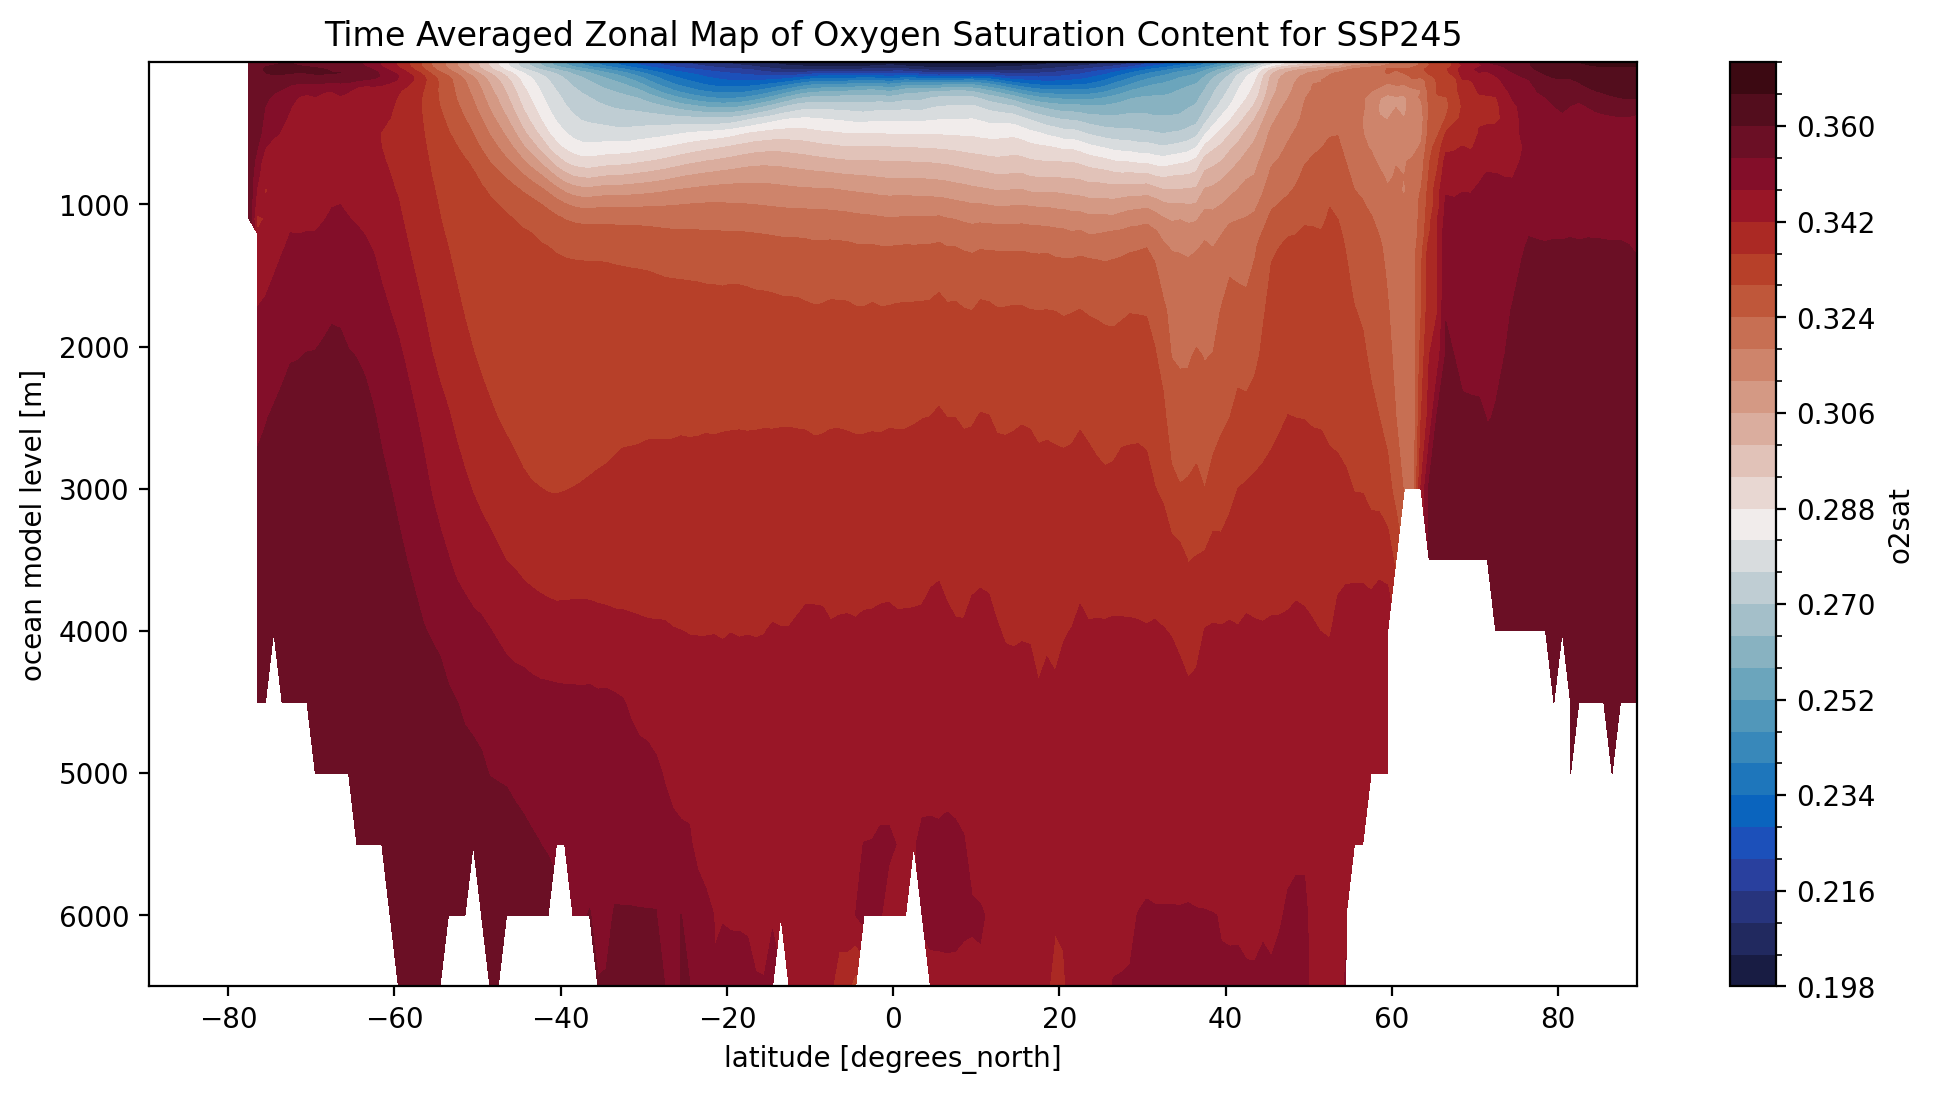

In [42]:
#time averaged across entire time period
ta_O2_sat_SSP245 = O2_sat_SSP245.mean(dim='time')
zm_O2_sat_SSP245 = ta_O2_sat_SSP245.mean(dim='longitude').plot.contourf(
    cmap=cmocean.cm.balance, yincrease=False, levels=30)
plt.title('Time Averaged Zonal Map of Oxygen Saturation Content for SSP245')

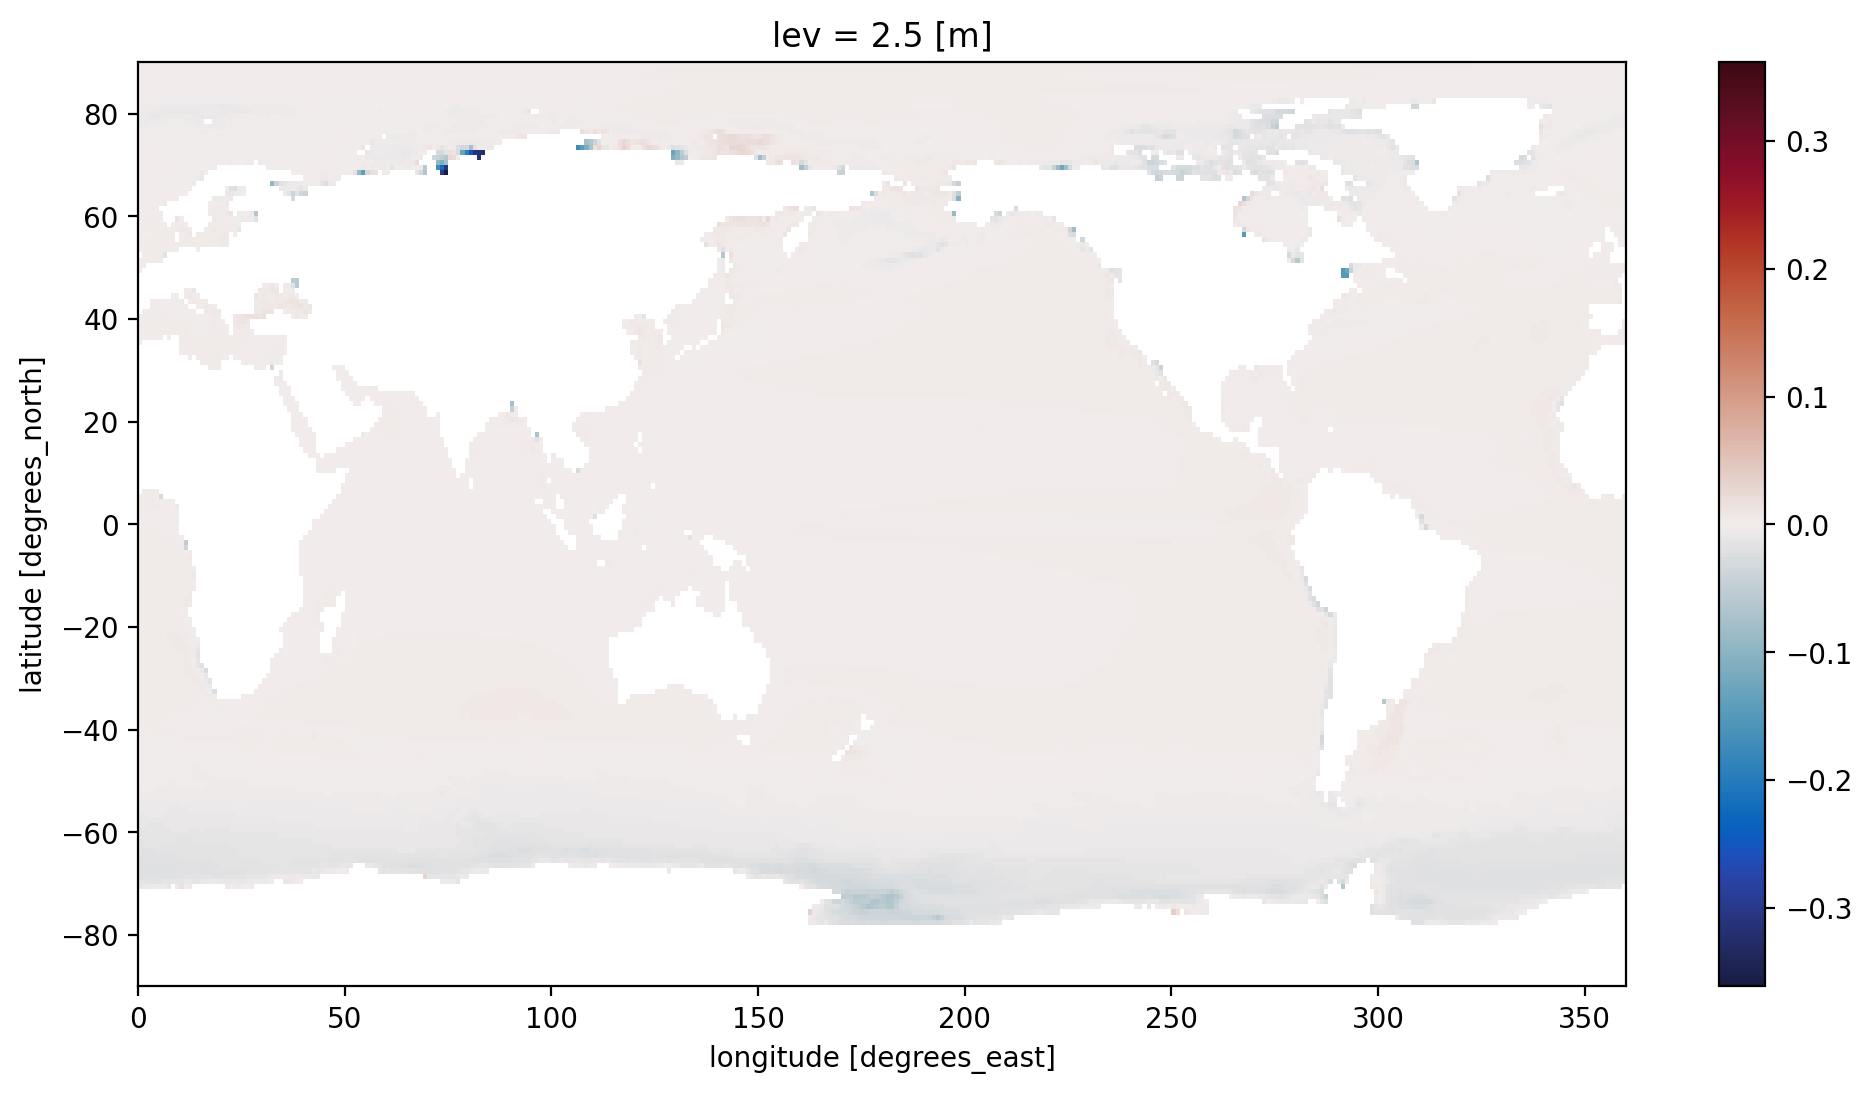

In [52]:
avg_O2_SSP245 = O2_SSP245.mean(dim='time')
avg_O2_sat_SSP245 = O2_sat_SSP245.mean(dim='time')
avg_aou_SSP245 = avg_O2_SSP245 - avg_O2_sat_SSP245
avg_aou_SSP245.isel(lev=0).plot(cmap=cmocean.cm.balance)

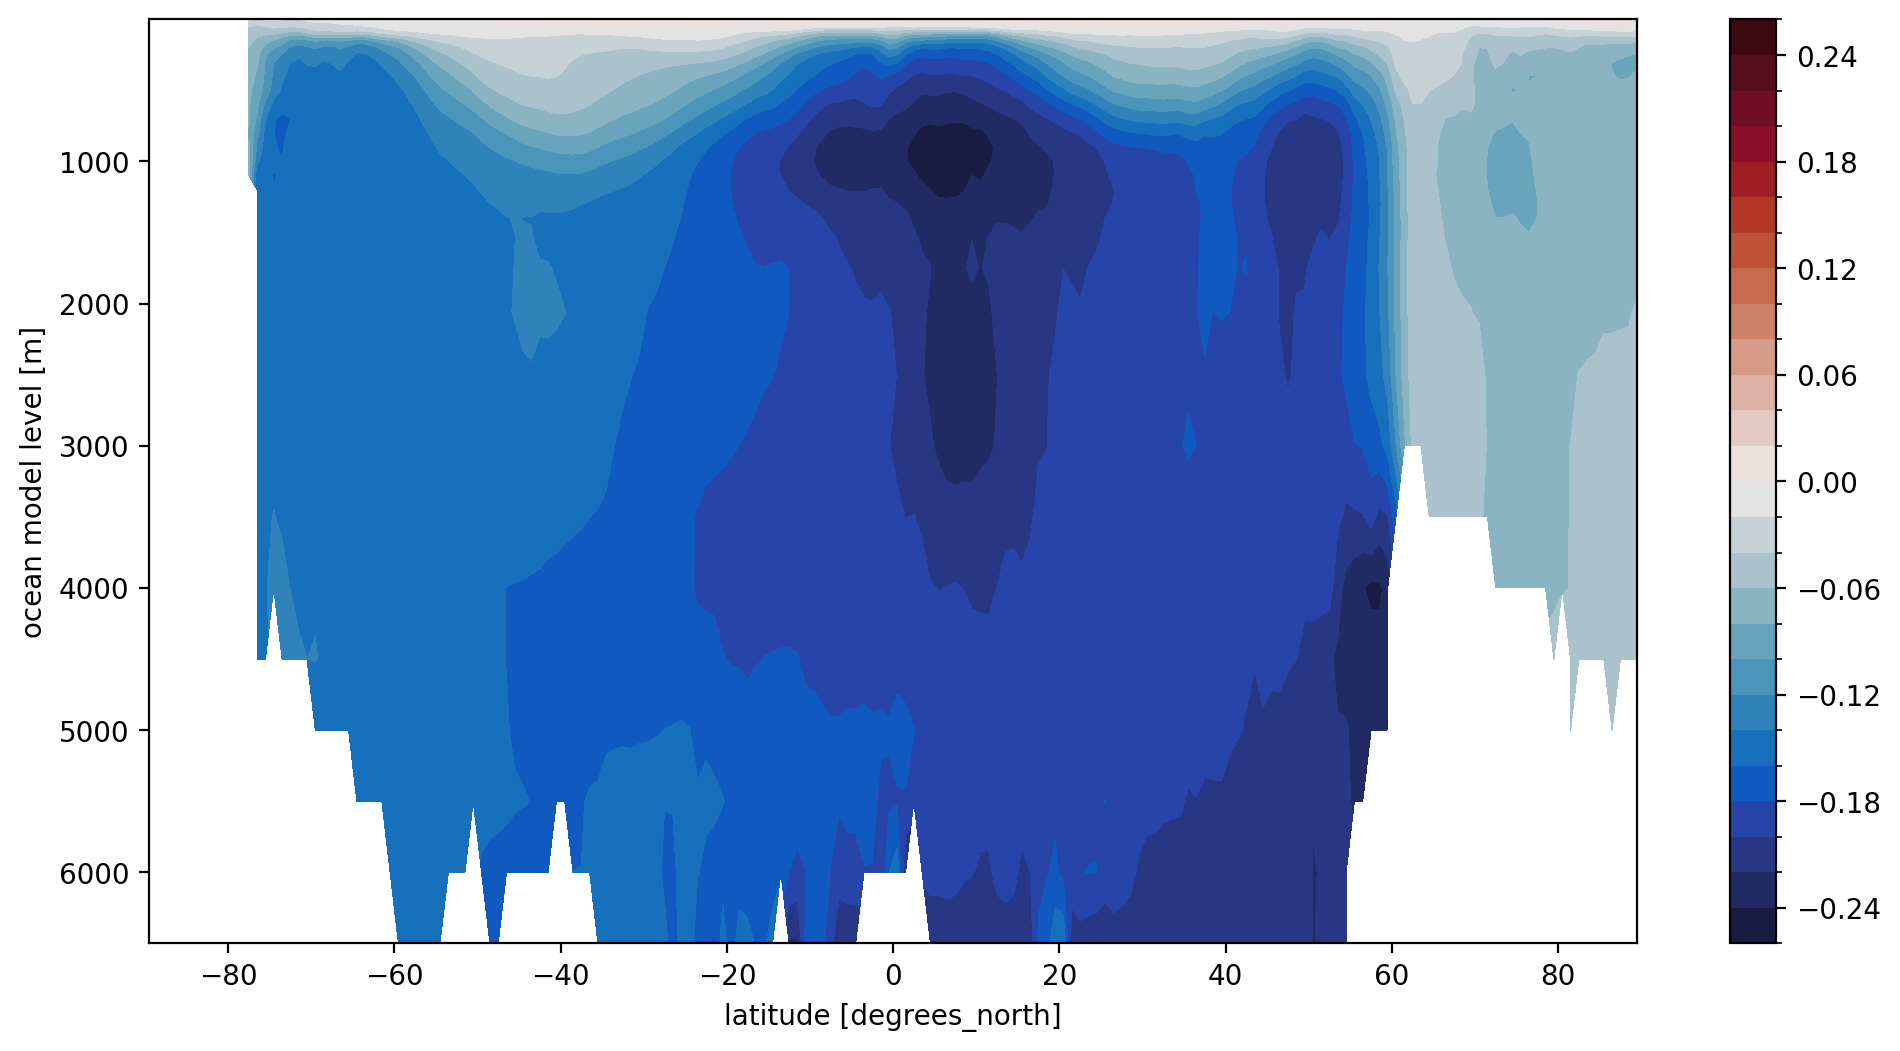

In [54]:
zm_O2_SSP245 = ta_O2_SSP245
zm_O2_sat_SSP245 = ta_O2_sat_SSP245
zm_aou_SSP245 = zm_O2_SSP245 - zm_O2_sat_SSP245
zm_aou_SSP245.mean(dim='longitude').plot.contourf(
    cmap=cmocean.cm.balance, yincrease=False, levels=30)

### Difference Plots for SSP245

In [12]:
#difference plots for dissolved O2 and O2 saturation performed by Anna Coomans
diff_O2_SSP245=(O2_SSP245.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time'))-(
    O2_SSP245.sel(time=slice('2015-01-16','2025-12-16')).mean(dim='time'))
diff_O2sat_SSP245=(O2_sat_SSP245.sel(time=slice('2081-01-16','2100-12-16')).mean(dim='time'))-(
    O2_sat_SSP245.sel(time=slice('2015-01-16','2025-12-16')).mean(dim='time'))

Text(0.5, 1.0, 'Difference in Dissolved Oxygen Content for SSP245 at SS')

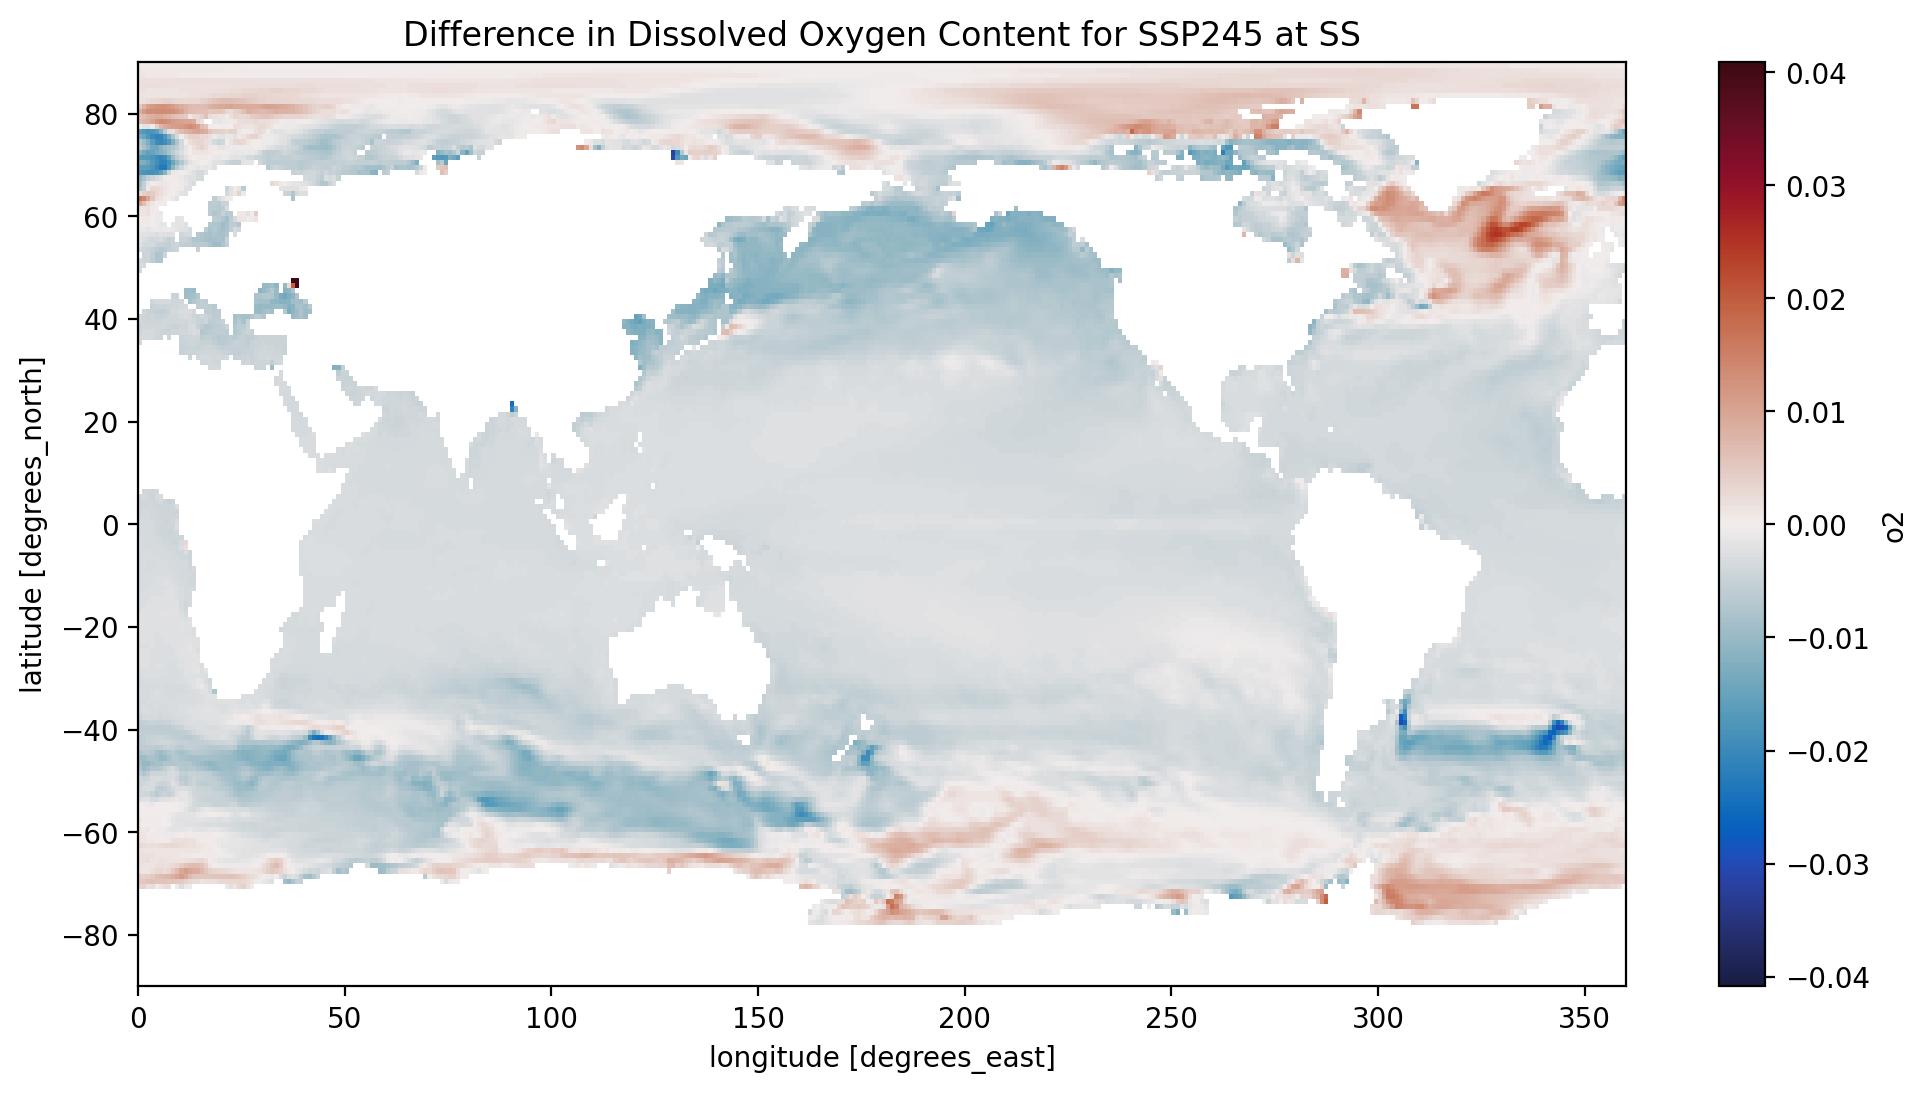

In [32]:
diff_245_O2_Surface = diff_O2_SSP245.isel(lev=0).plot(cmap=cmocean.cm.balance)
plt.title('Difference in Dissolved Oxygen Content for SSP245 at SS')

Text(0.5, 1.0, 'Zonal Average Difference of Dissolved Oxygen Content for SSP245')

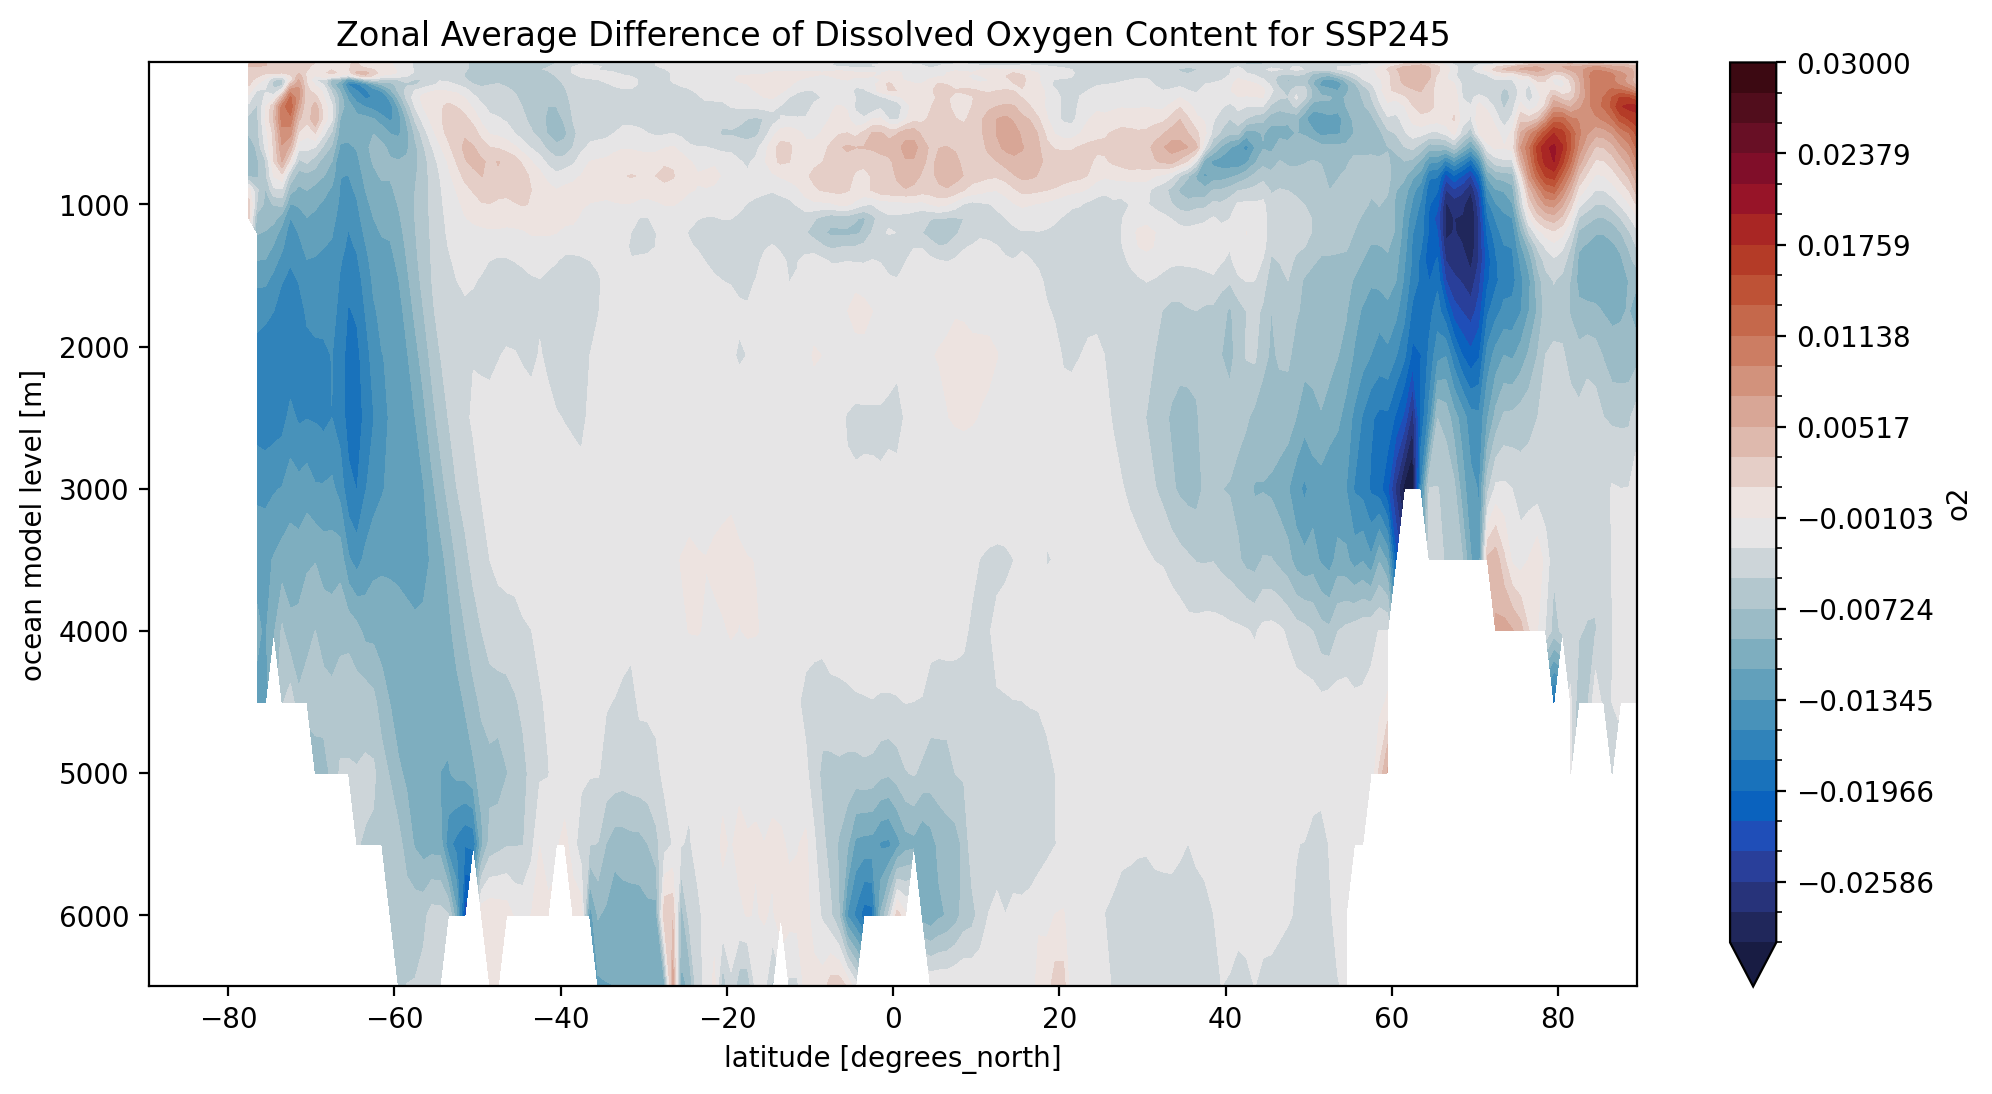

In [39]:
zd_245_02= diff_O2_SSP245.mean(dim='longitude').plot.contourf(
    cmap=cmocean.cm.balance, yincrease=False, vmin=-0.03,vmax=0.03,levels=30)
plt.title('Zonal Average Difference of Dissolved Oxygen Content for SSP245')

Text(0.5, 1.0, 'Difference in Dissolved Oxygen Content at Saturation for SSP245 at SS')

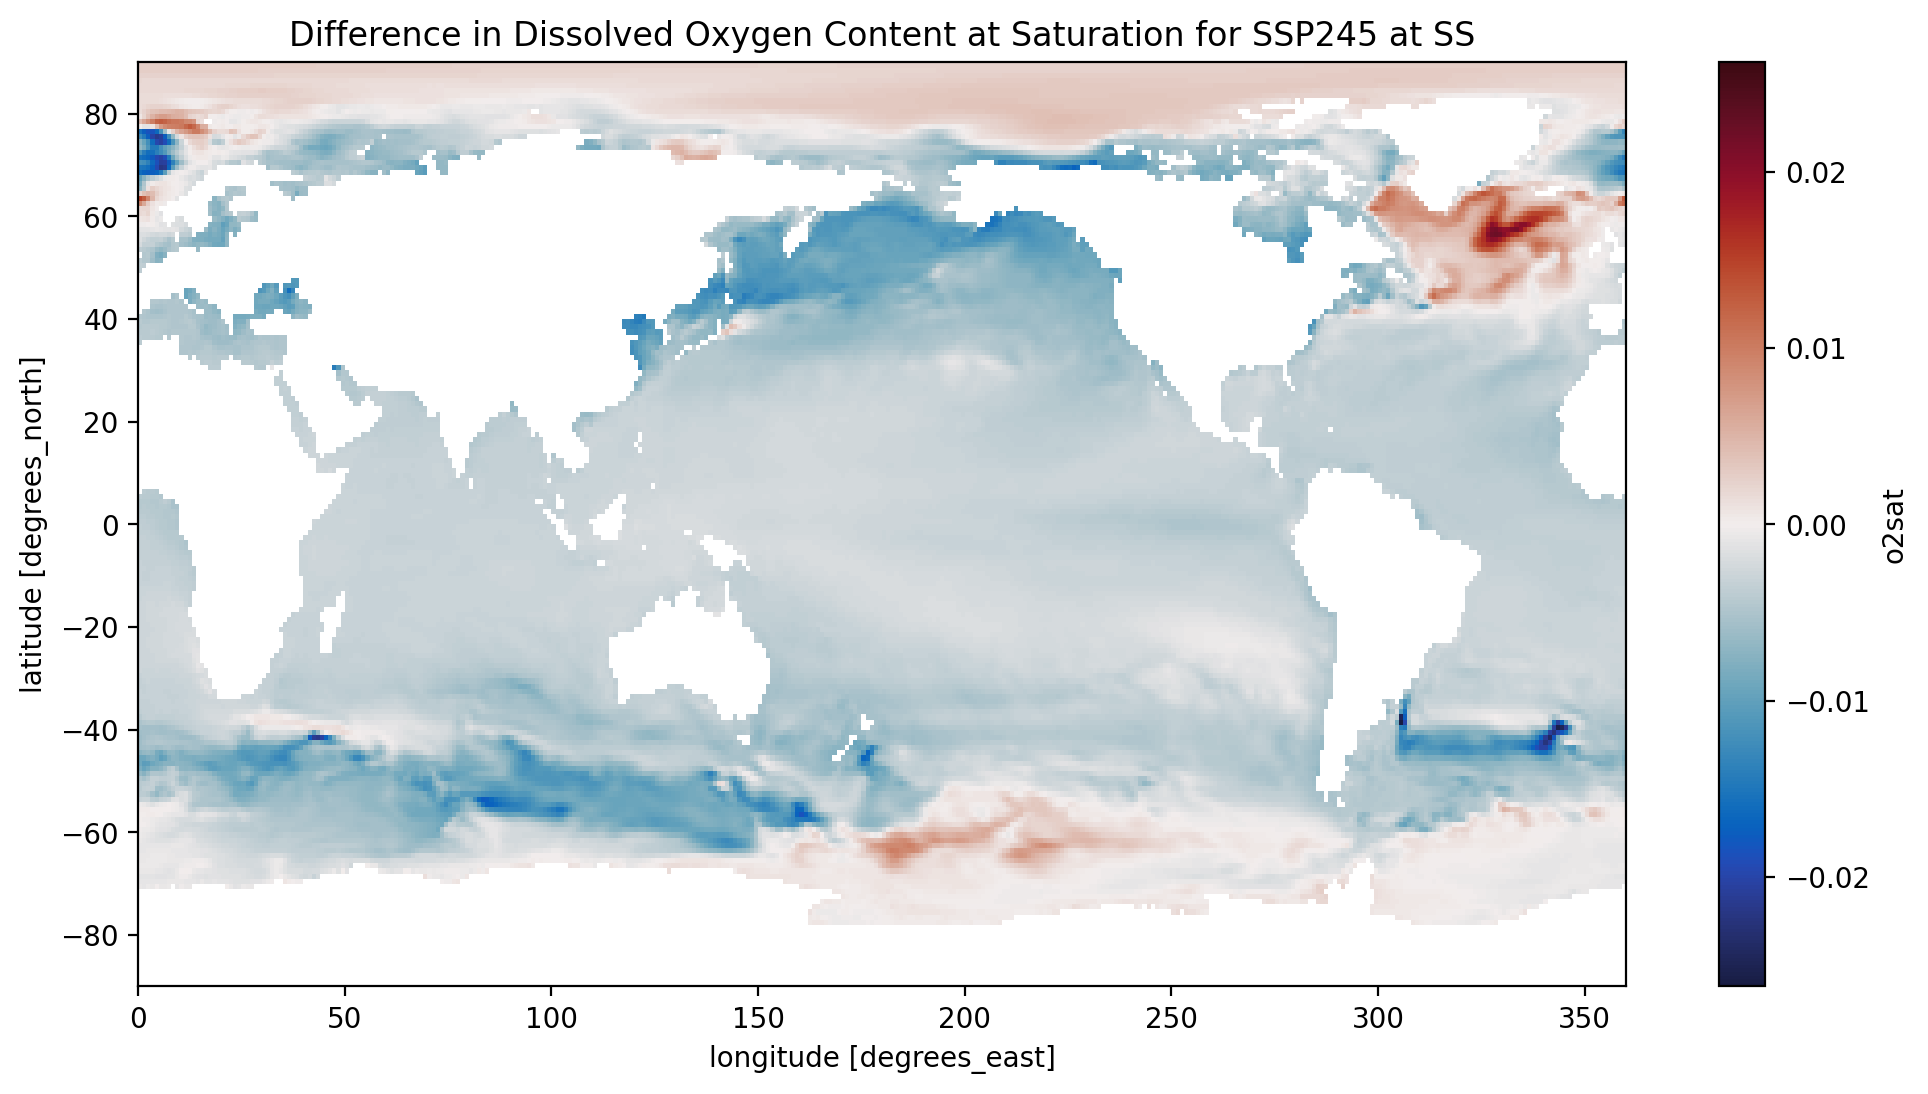

In [15]:
diff_245_O2S_Surface = diff_O2sat_SSP245.isel(lev=0).plot(cmap=cmocean.cm.balance)
plt.title('Difference in Dissolved Oxygen Content at Saturation for SSP245 at SS')

Text(0.5, 1.0, 'Zonal Average of Difference Dissolved Oxygen Content at Saturation for SSP245')

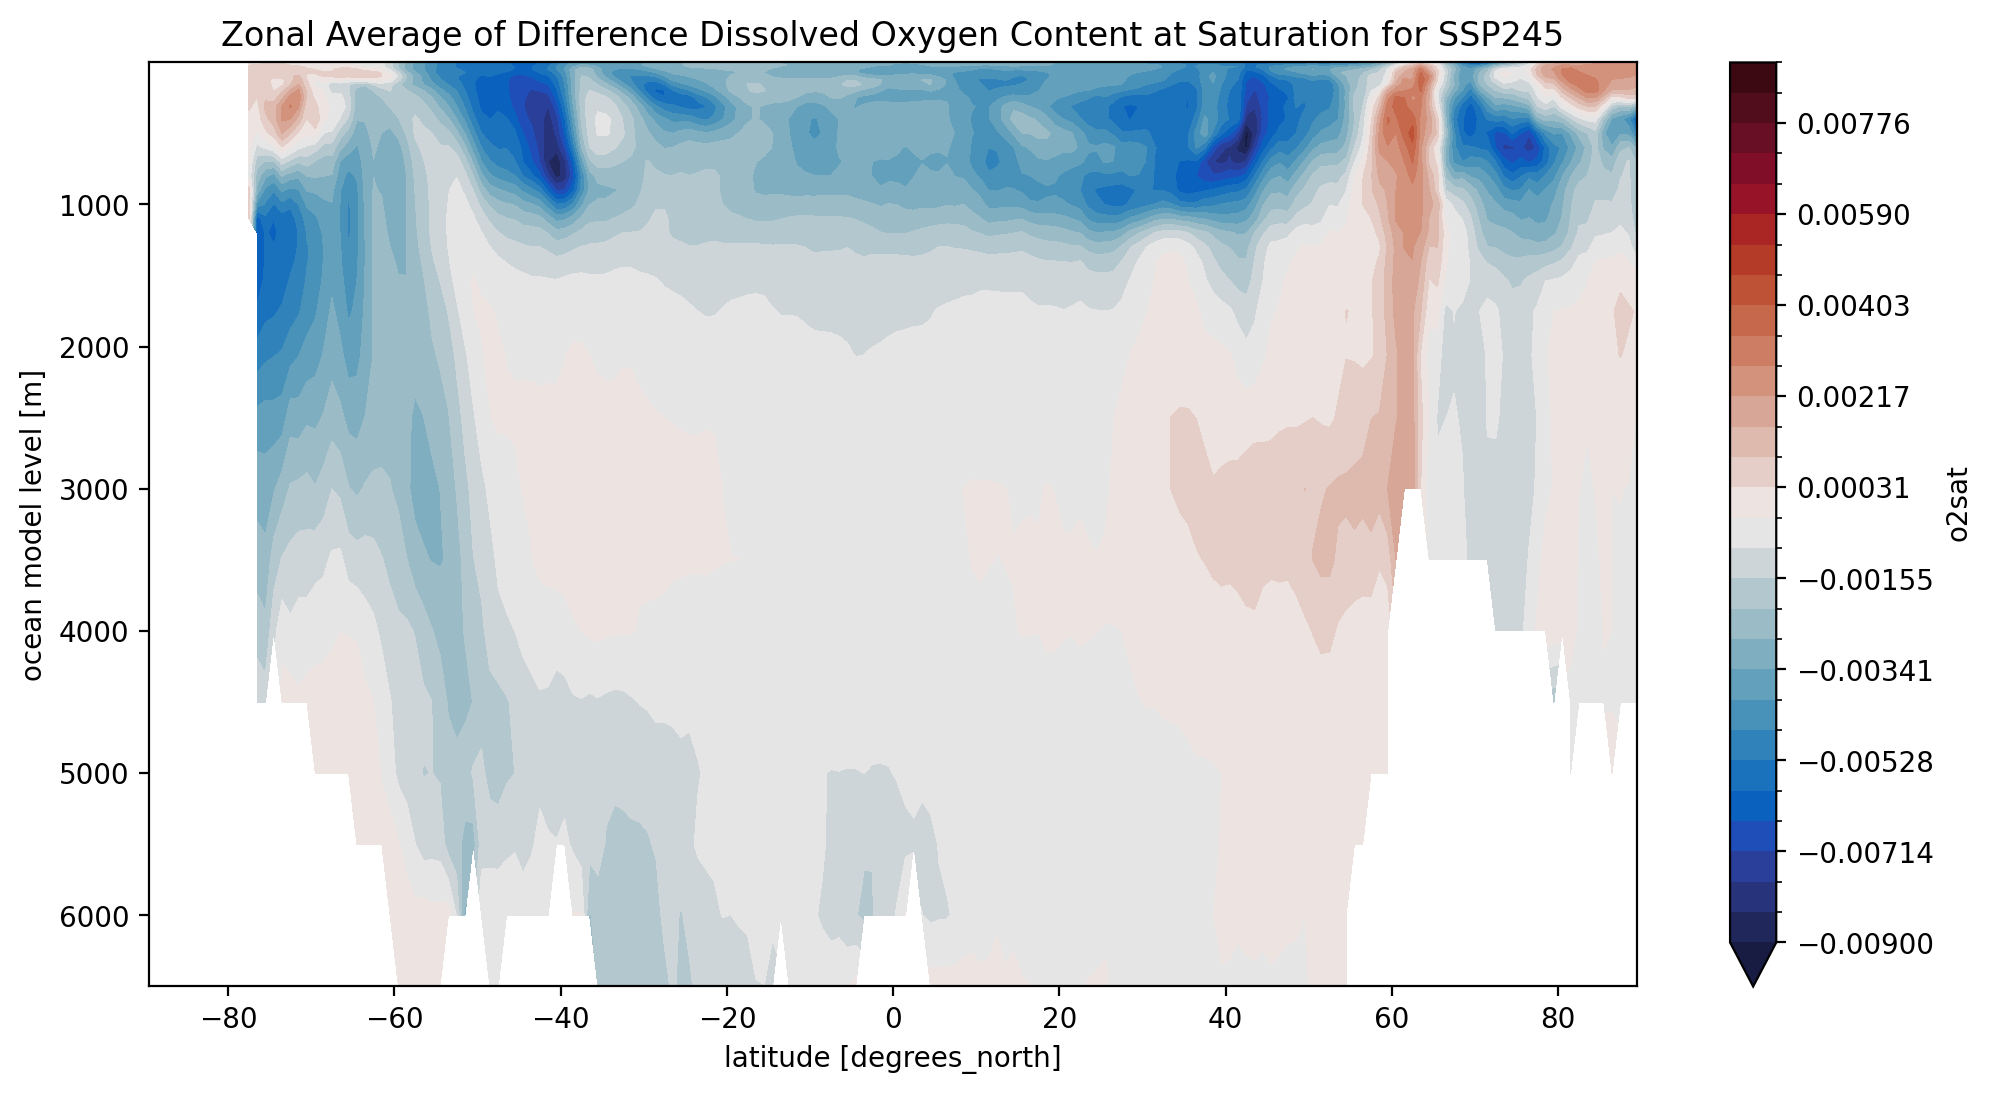

In [21]:
zd_245_02S= diff_O2sat_SSP245.mean(dim='longitude').plot.contourf(
    cmap=cmocean.cm.balance, yincrease=False,  vmin=-0.009,vmax=0.009,levels=30)
plt.title('Zonal Average of Difference Dissolved Oxygen Content at Saturation for SSP245')

### Load in averaged WOA18 datasets using xr.open_zarr and extract the respective DataArrays. These datasets contain ALL ocean oxygen measurements spanning the period 1955 to 2017.

In [17]:
woa18_o2 = xr.open_zarr('../data/woa18/woa_oxygen_dissolved_all',decode_times=False).dissolved
woa18_o2_sat = xr.open_zarr('../data/woa18/woa_oxygen_saturation_all',decode_times=False).oxygen_saturation
woa18_aou = xr.open_zarr('../data/woa18/woa_aou_all',decode_times=False).aou

### For analysis at the basin scale you will need the ocean basins mask provided below. This seperates the global ocean into distinct basins identified by integer values such that:
* ### Southern Ocean = 1
* ### Atlantic Ocean = 2
* ### Pacific Ocean = 3
* ### Arctic Ocean = 4
* ### Indian Ocean = 5

In [18]:
woa18_basins = xr.open_dataset('../data/basins/woa18_basins_mask.nc',decode_times=False).mask

Text(0.5, 1.0, 'Ocean Basin Mask')

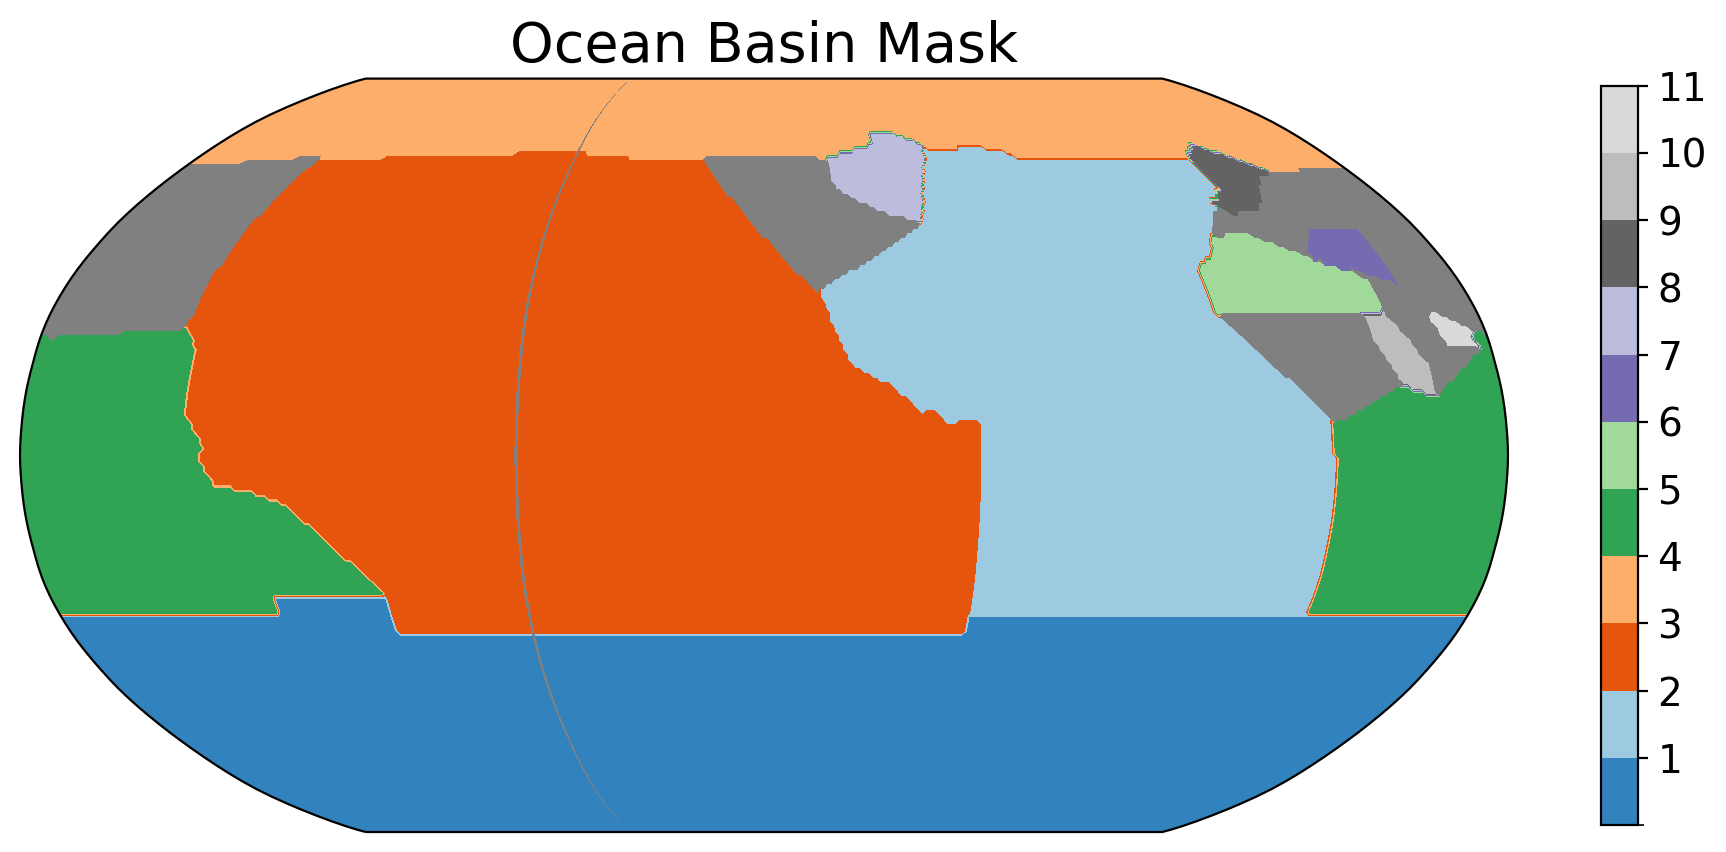

In [19]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_basins.plot.contourf(x='lon',y='lat',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels=12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[1,2,3,4,5,6,7,8,9,10,11], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)

In [20]:
southernocean = (woa18_basins.where(woa18_basins==1) /  woa18_basins.where(woa18_basins==1)) ### Values 1 over southern, NaN elsewhere
atlanticocean = (woa18_basins.where(woa18_basins==2) / woa18_basins.where(woa18_basins==2)) ### Values 2 over atlantic, NaN elsewhere
pacificocean = (woa18_basins.where(woa18_basins==3) / woa18_basins.where(woa18_basins==2))
arcticocean = (woa18_basins.where(woa18_basins==5) / woa18_basins.where(woa18_basins==2))
### and so on for the other basins ..... work through the code above step by step
### to make sure you understand it."